In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

In [4]:
#importando o DEMO PHQ csv
PHQ = pd.read_csv('DEMO_PHQ.csv')

Descricao das variaveis do Demo PHQ:
SEQN -- Identificador único do respondente

    Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir: 
    0 = Nenhuma vez
    1 = Menos de uma semana
    2 = Uma semana ou mais
    3 = Quase todos os dias
    7 = Se recusou a responder
    9 = Não sabe

DPQ010 -- Pouco interesse ou prazer em fazer as coisas

DPQ020 -- Se sentiu para baixo, deprimido(a) ou sem perspectiva

DPQ030 -- Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o
costume

DPQ040 -- Se sentiu cansado(a) ou com pouca energia

DPQ050  -- Falta de apetite ou comeu demais

DPQ060 -- Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou
sua família ou a você mesmo(a)

DPQ070 -- Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)

DPQ080 -- Teve lentidão para se movimentar ou falar (a ponto de outras pessoas
perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de
um lado para o outro mais do que costume

DPQ090 -- Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)

RIAGENDR Gênero: 1 - Masculino 2 - Feminino

RIDAGEYR: Idade em Anos

RIDRETH1: Raça/Etnia :
    1 = Branco não- hispânico
    2 = Negro não- hispânico
    3 = Mexicano-americano
    4 = Outro
    5 = Outro - Hispânico

DMDEDUC: Escolaridade: 
1 = Menor que 9o ano 
2 = 9-12o ano
3 = Ensino médio
4 = Ensino superior incompleto
5 = Superior completo ou maior
7 = Se recusou a responder
9 = Não sabe

INDFMINC: Renda anual familiar (US$):

1 = 0-4999
2 - 5000- 9999
3 = 10000- 14999
4 = 15000- 19999
5 = 20000- 24999
6 = 25000- 34999
7 = 35000- 44999
8 = 45000- 54999
9 = 55000- 64999
10 = 65000-74999 
11 = Maior ou igual a 75000
12 = Maior que 20000
13 = Menor que 20000
77 = Se recusou a responder
99 = Não sabe

In [5]:
#Importando o PAG HEI:
HEI = pd.read_csv('PAG_HEI.csv')

Descricao das variaveis PAG HEI:

SEQN -- Identificador único do respondente

PAG_MINW -- Tempo total semanal de atividade aeróbica moderada- vigorosa em minutos segundo o Physical Activity Guideline (PAG)

ADHERENCE -- Grupo de aderência ao Physical Activity Guideline (PAG):

        1 = Baixo (< 150 min/semana)
        2 = Adequado (150-300min/semana)
        3 = Acima (> 300min/semana)

HEI2015C1_TOTALVEG -- Healthy Eating Index - Componente 1 - Total de Vegetais (0-5)

HEI2015C2_GREEN_AND_BEAN -- Healthy Eating Index - Componente 2 - Verduras verde-escuras e leguminosas (0-5)

HEI2015C3_TOTALFRUIT -- Healthy Eating Index - Componente 3 - Frutas totais (0-5)

HEI2015C4_WHOLEFRUIT -- Healthy Eating Index - Componente 4 - Frutas in natura (0-5)

HEI2015C5_WHOLEGRAIN -- Healthy Eating Index - Componente 5 - Grãos integrais (0-10)

HEI2015C6_TOTALDAIRY -- Healthy Eating Index - Componente 6 - Laticínios (0-10)

HEI2015C7_TOTPROT -- Healthy Eating Index - Componente 7 - Proteínas (0-5)

HEI2015C8_SEAPLANT_PROT -- Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais (0-5)

HEI2015C9_FATTYACID -- Healthy Eating Index - Componente 9 - Ácido-graxo (0-10)

HEI2015C10_SODIUM -- Healthy Eating Index - Componente 10 - Sódio (0-10)

HEI2015C11_REFINEDGRAIN -- Healthy Eating Index - Componente 11 - Grãos refinados (0-10)

HEI2015C12_SFAT -- Healthy Eating Index - Componente 12 - Gordura saturada (0-10)

HEI2015C13_ADDSUG -- Healthy Eating Index - Componente 13 - Açúcares adicionados (0-10)

HEI2015_TOTAL_SCORE -- Healthy Eating Index - Escore total (0-100)

In [6]:
#Primeiro Passo: Como o PHQ leva em consideracao o somatorio, as categorias [7 - Se recusou a responder] e [9 - não sabe podem]
#Atrapalhar o somatorio. Sendo assim, devemos condificá-las:
score_variables = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']
test = PHQ[score_variables][1:10]
test[test == 1] = 50
test

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,50.0,0.0,0.0,0.0
5,0.0,50.0,50.0,50.0,50.0,50.0,50.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,50.0,50.0,0.0,0.0,50.0,0.0,0.0


In [7]:
PHQ[PHQ[score_variables] == 7] = 0
PHQ[PHQ[score_variables] == 9] = 0
PHQ[PHQ['DMDEDUC'] == 7] = 0
PHQ[PHQ['DMDEDUC'] == 9] = 0
PHQ[PHQ['INDFMINC'] == 77] = 0
PHQ[PHQ['INDFMINC'] == 99] = 0

PHQ.head()



,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [8]:
#Removing the first row, since it's all NaNs
PHQ.drop(0,axis = 0,inplace = True)

In [36]:
#Dealing with Missing Values:
PHQ.isnull().mean()
#Since the highest count of missing values is barely 9%, I've decided to continue the analysis without imputing values

SEQN        0.000000
DPQ010      0.087380
DPQ020      0.087380
DPQ030      0.087380
DPQ040      0.087380
DPQ050      0.087380
DPQ060      0.087380
DPQ070      0.087380
DPQ080      0.087380
DPQ090      0.087380
RIAGENDR    0.000000
RIDAGEYR    0.000000
RIDRETH1    0.000000
DMDEDUC     0.000000
INDFMINC    0.008813
SOMA        0.000000
phq_grp     0.000000
dtype: float64

In [37]:
SOMA = []
a = ""
for i in range(1,len(PHQ)+1):
    SOMA.append(PHQ.loc[i,score_variables].sum())

PHQ['SOMA'] = SOMA
PHQ

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,SOMA,phq_grp
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,0.0,0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,0.0,0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,0.0,0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,4.0,0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,2.0,0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,10.0,2
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,2.0,0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0,0.0,0


In [10]:
PHQ['phq_grp'] = ""
phq_grp = []
a = 0
for i in range(1,len(PHQ)+1):
    if(PHQ.loc[i,"SOMA"] < 5):
        a = 0
    elif((PHQ.loc[i,"SOMA"] >= 5) & (PHQ.loc[i,"SOMA"] < 10)):
        a = 1
    elif((PHQ.loc[i,"SOMA"] >= 10) & (PHQ.loc[i,"SOMA"] < 15)):
        a = 2
    elif((PHQ.loc[i,"SOMA"] >= 15) & (PHQ.loc[i,"SOMA"] <= 19)):
        a = 3
    else:
        a = 4
    phq_grp.append(a)
PHQ['phq_grp'] = phq_grp
PHQ


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,SOMA,phq_grp
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,0.0,0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,0.0,0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,0.0,0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,4.0,0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,2.0,0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,10.0,2
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,2.0,0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0,0.0,0


In [11]:
PHQ_Filtered = PHQ.drop(labels = score_variables,axis= 1)
PHQ_Filtered

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,SOMA,phq_grp
1,31131,2,44,4,4,11.0,0.0,0
2,31132,1,70,3,5,11.0,0.0,0
3,31134,1,73,3,3,12.0,0.0,0
4,31139,2,18,2,3,11.0,4.0,0
5,31143,1,19,3,4,11.0,6.0,1
...,...,...,...,...,...,...,...,...
5329,41466,2,58,5,2,3.0,2.0,0
5330,41468,2,66,1,1,8.0,10.0,2
5331,41469,1,19,4,4,2.0,2.0,0
5332,41472,1,34,3,4,7.0,0.0,0


In [12]:
merge_df = pd.merge(PHQ_Filtered,HEI,on = 'SEQN')

In [13]:
#Dropping some collumns and leaving the health score.
health_cols = ['HEI2015C1_TOTALVEG','HEI2015C2_GREEN_AND_BEAN','HEI2015C3_TOTALFRUIT','HEI2015C4_WHOLEFRUIT','HEI2015C5_WHOLEGRAIN','HEI2015C6_TOTALDAIRY','HEI2015C7_TOTPROT','HEI2015C8_SEAPLANT_PROT','HEI2015C9_FATTYACID','HEI2015C10_SODIUM','HEI2015C11_REFINEDGRAIN','HEI2015C12_SFAT','HEI2015C13_ADDSUG']
merge_df.drop(labels = health_cols,axis = 1,inplace = True)
merge_df

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,SOMA,phq_grp,PAG_MINW,ADHERENCE,HEI2015_TOTAL_SCORE
0,31131,2,44,4,4,11.0,0.0,0,264.711316,2.0,35.553899
1,31132,1,70,3,5,11.0,0.0,0,1353.348730,3.0,63.551696
2,31134,1,73,3,3,12.0,0.0,0,1011.478060,3.0,42.886826
3,31139,2,18,2,3,11.0,4.0,0,1729.145497,3.0,47.074393
4,31143,1,19,3,4,11.0,6.0,1,3768.083141,3.0,46.086131
...,...,...,...,...,...,...,...,...,...,...,...
5211,41466,2,58,5,2,3.0,2.0,0,9.237875,1.0,59.949915
5212,41468,2,66,1,1,8.0,10.0,2,173.210162,2.0,57.747869
5213,41469,1,19,4,4,2.0,2.0,0,184.711316,2.0,42.993323
5214,41472,1,34,3,4,7.0,0.0,0,27.713626,1.0,46.134467


In [14]:
AGEGRP = []
a = ""
for i in range(0,len(merge_df)):
    if((merge_df.loc[i,"RIDAGEYR"] >= 18) & (merge_df.loc[i,"RIDAGEYR"] <25 )):
        a = "18-25"
    elif((merge_df.loc[i,"RIDAGEYR"] >= 25) & (merge_df.loc[i,"RIDAGEYR"] < 35 )):
        a = "25-35"
    elif((merge_df.loc[i,"RIDAGEYR"] >= 35) & (merge_df.loc[i,"RIDAGEYR"] < 45 )):
        a = "35-45"
    elif((merge_df.loc[i,"RIDAGEYR"] >= 45) & (merge_df.loc[i,"RIDAGEYR"] < 55 )):
        a = "45-55"
    elif((merge_df.loc[i,"RIDAGEYR"] >= 55) & (merge_df.loc[i,"RIDAGEYR"] < 65 )):
        a = "55-65"
    elif((merge_df.loc[i,"RIDAGEYR"] >= 65) & (merge_df.loc[i,"RIDAGEYR"] < 75 )):
        a = "65-75"
    else:
        a = "75-85"
    AGEGRP.append(a)
merge_df['AGEGRP'] = AGEGRP
merge_df

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,SOMA,phq_grp,PAG_MINW,ADHERENCE,HEI2015_TOTAL_SCORE,AGEGRP
0,31131,2,44,4,4,11.0,0.0,0,264.711316,2.0,35.553899,35-45
1,31132,1,70,3,5,11.0,0.0,0,1353.348730,3.0,63.551696,65-75
2,31134,1,73,3,3,12.0,0.0,0,1011.478060,3.0,42.886826,65-75
3,31139,2,18,2,3,11.0,4.0,0,1729.145497,3.0,47.074393,18-25
4,31143,1,19,3,4,11.0,6.0,1,3768.083141,3.0,46.086131,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...
5211,41466,2,58,5,2,3.0,2.0,0,9.237875,1.0,59.949915,55-65
5212,41468,2,66,1,1,8.0,10.0,2,173.210162,2.0,57.747869,65-75
5213,41469,1,19,4,4,2.0,2.0,0,184.711316,2.0,42.993323,18-25
5214,41472,1,34,3,4,7.0,0.0,0,27.713626,1.0,46.134467,25-35


c:\Users\trank\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGEGRP', ylabel='count'>

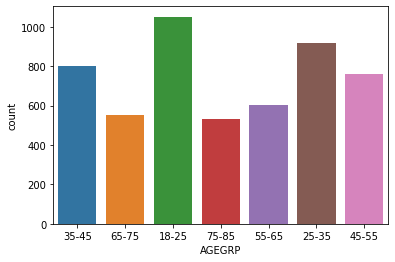

In [15]:
sns.countplot(merge_df['AGEGRP'])

O gráfico acima nos mostra como estão distribuídas as idades presentes em nossa pesquisa. Percebemos um certo nivelamento, com concentração de pessoas mais jovens (45-). Pessoas na faixa de 18-25 anos correspondem à maior porcentagem de pacientes.

In [16]:
merge_df.drop(labels = 'RIDAGEYR',axis = 1, inplace = True)

c:\Users\trank\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RIAGENDR', ylabel='count'>

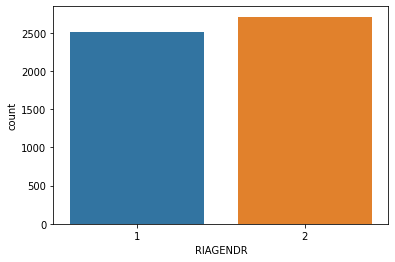

In [17]:
sns.countplot(merge_df['RIAGENDR'])

Pelo gráfico acima observamos uma boa distribuição em relação ao gênero dos entrevistados, sem desbalanceamento neste caso

c:\Users\trank\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RIDRETH1', ylabel='count'>

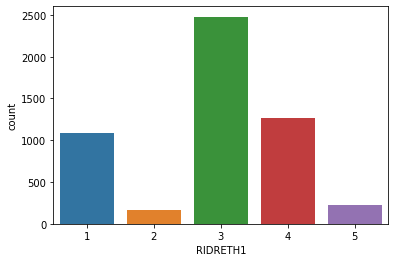

In [18]:
sns.countplot(merge_df['RIDRETH1'])

Um certo desbalanceamento em relação aos grupos etnicos apresentados. Percebemos um número excessivo de pessoas da etnia 3 (Mexicano-Americano) em relação a pessoas dos grupo étnicos 2 e 5 (Negro não hispânico e Outro-Hispânico)

c:\Users\trank\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMDEDUC', ylabel='count'>

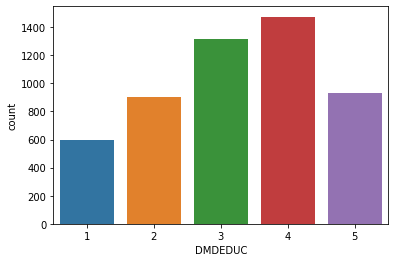

In [19]:
sns.countplot(merge_df['DMDEDUC'])

Nivel educacional relativamente balanceado, com menor presença das classes 1 e 5 (Menor que 9o ano e Superior completo ou maior)

c:\Users\trank\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INDFMINC', ylabel='count'>

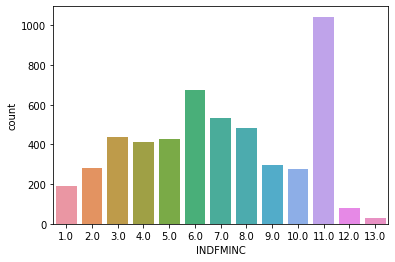

In [20]:
sns.countplot(merge_df['INDFMINC'])

Distribuição relativamente balanceada de Renda anual familiar, com um pico na categoria 11: Maior ou Igual a 75000

<AxesSubplot:xlabel='PAG_MINW', ylabel='Count'>

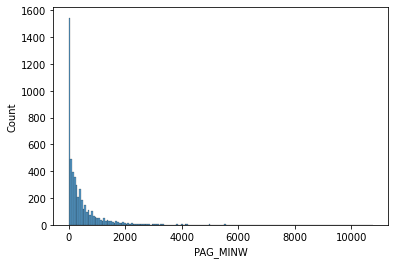

In [21]:
sns.histplot(merge_df['PAG_MINW'])

A distribuição de Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG) é assimétrica positiva, com os valores concentrados em classes mais baixas, com um pico em 0 minutos exercitados

<AxesSubplot:xlabel='HEI2015_TOTAL_SCORE', ylabel='Count'>

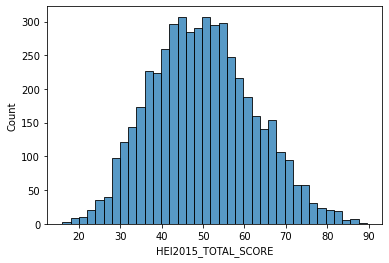

In [22]:
sns.histplot(merge_df['HEI2015_TOTAL_SCORE'])

A distribuição do Health Eating Index se aproxima de uma distribuição normal, com os maiores valores estando na faixa de 40-60

<AxesSubplot:xlabel='ADHERENCE', ylabel='SOMA'>

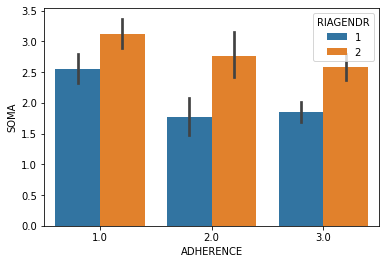

In [23]:
sns.barplot(data =merge_df,hue = 'RIAGENDR',x='ADHERENCE',y = 'SOMA')

Relacionando Gênero, Aderência ao Physical Activity Guideline e Soma, percebemos que as mulheres apresentam uma Soma maior no score de depressão para todos os níveis de aderência à atividade física

<AxesSubplot:xlabel='AGEGRP', ylabel='SOMA'>

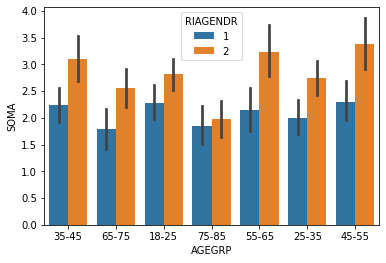

In [24]:
sns.barplot(data =merge_df,hue = 'RIAGENDR',x='AGEGRP',y = 'SOMA')

Percebemos também que, para todas as faixas etárias, mulheres possuem uma SOMA de phq9 maior que a masculina, com um pico positivo na faixa de 45-55 anos, e menores na faixa de 75-85, para mulheres, e 65-75, para homens.

<AxesSubplot:xlabel='HEI2015_TOTAL_SCORE', ylabel='SOMA'>

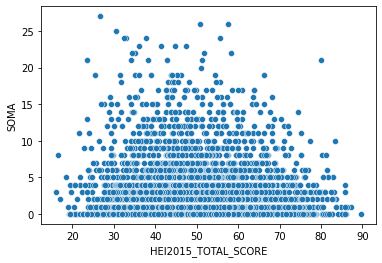

In [25]:
sns.scatterplot(data= merge_df,x = 'HEI2015_TOTAL_SCORE', y = "SOMA")

Não podemos perceber uma correlação aparente entre Health Eating Index e SOMA do questionario phq9

<AxesSubplot:xlabel='INDFMINC', ylabel='SOMA'>

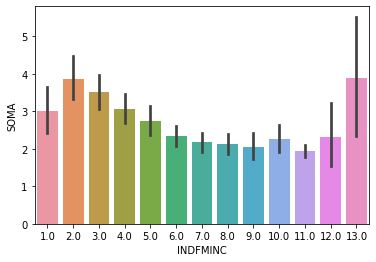

In [26]:
sns.barplot(data = merge_df, x = 'INDFMINC', y = 'SOMA')

Podemos pereceber uma tendencia decrescente na soma do questionátio phq9 quando a renda familiar vai aumentando, com os maiores valores concentrados em rendas menores que 20000 anual (categorias 1,2,3,4 e 13)

<AxesSubplot:xlabel='PAG_MINW', ylabel='SOMA'>

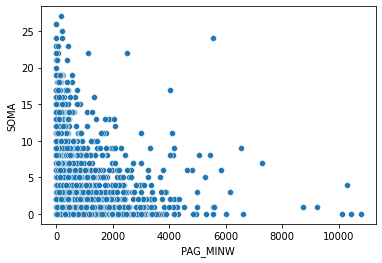

In [27]:
sns.scatterplot(data = merge_df, x = 'PAG_MINW', y = 'SOMA')

Percebemos uma tendencia a valores mais altos de PAG terem uma soma menor no score PHQ9, mas essa relação não é tão definitiva

<AxesSubplot:xlabel='phq_grp', ylabel='ADHERENCE'>

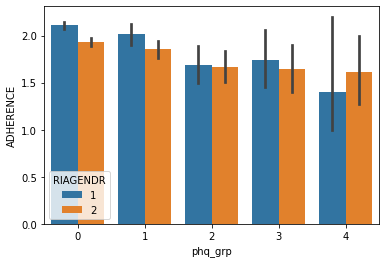

In [28]:
sns.barplot(data = merge_df, x = 'phq_grp',y = 'ADHERENCE',hue = 'RIAGENDR' )

Percebemos que temos uma proporção maior de homens em todos os grupos de severidade de sintomas de depressão, exceto no de sintomas mais severos, sendo dominado pelas mulheres.

<AxesSubplot:xlabel='ADHERENCE', ylabel='SOMA'>

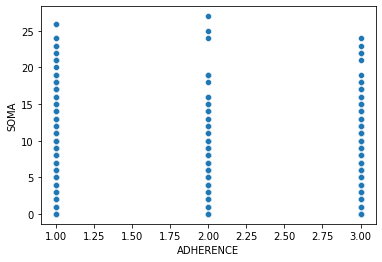

In [29]:
sns.scatterplot(data = merge_df,y = "SOMA",x= "ADHERENCE")

Não percebemos uma tendencia diferente de valores de soma em relação a aderencia a atividade fisica

Considerações:
1. Qual o tipo de estudo está sendo empregado pelo NHANES? experimental ou observacional?
    R. O estudo empregado é observacional
2. Discuta as possíveis fontes de viés presentes na análise:
    R.Percebemos um certo viés de seleção quando temos uma disparidade tão grande na proporção dos grupos étnicos apresentados.
3. A partir da análise realizada, podemos afirmar que hábitos saudáveis possuem um efeito causal na prevenção de depressão?
    R. Indicar um efeito causal é uma afirmativa muito forte, que não pôde ser alcançada com os gráficos aqui elaborados. a correlação entre HEI e PHQ9 não era tão forte, bem como o de aderência com o PHQ9. Existe uma tendencia leve à diminuição do PHQ9 em relação a altas quantidades de exercício físico feito na semana, mas nada definitivo.
4.Quais são as fraquezas das análises realizadas? O que pode ser feito para melhorar?
    R.As análises realizadas não levaram em consideração fatores genéticos como histórico familiar de depressão, um consenso no meio científico que possui um grande peso. A pesquisa poderia ter tido um viés experimental, verificando a melhora (ou não) dos sintomas de depressão conforme melhorava a alimentação e atividade física dos pacientes.
5. Quais outras variáveis/informações poderiam ter sido coletadas para esta análise?
    R. Histórico familiar de depressão, se a pessoa já está fazendo ou já fez tratamento profissional...